#Exploratory Data Analysis : Laptop Pricing Dataset

##Objective:

 - Clean the data
 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('laptops.csv')
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [10]:
df.isnull().sum()

,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


In [11]:
df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean(), inplace=True)
df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace=True)

/tmp/ipython-input-1741258668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean(), inplace=True)
/tmp/ipython-input-1741258668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

##Visualizing Individual Feature Patterns.

Generating Regression Plot for **'CPU_frequency'** against **'Price'**

(0.0, 3974.15)

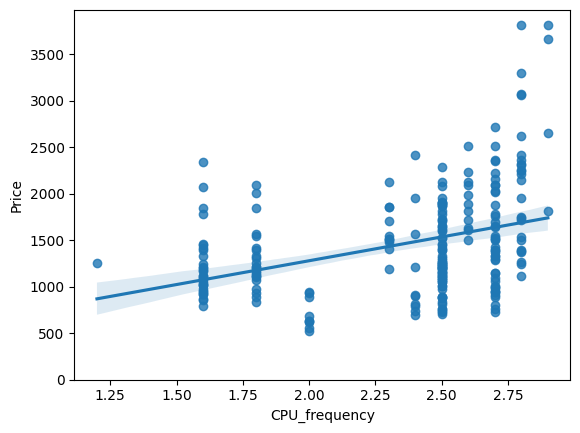

In [12]:
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

Generating Regression Plot for **'Screen_Size_cm'** against **'Price'**

(0.0, 3974.15)

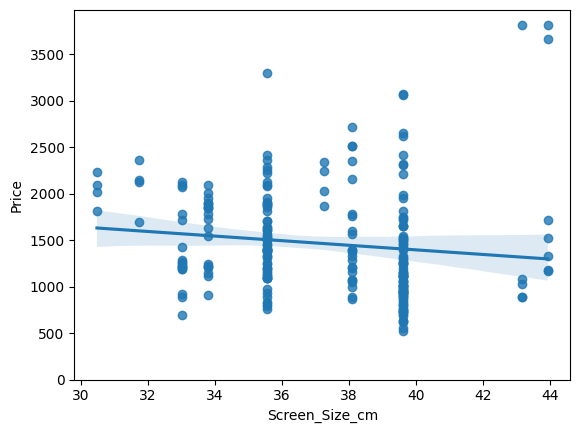

In [13]:
sns.regplot(x="Screen_Size_cm", y="Price", data=df)
plt.ylim(0,)

Generating Regression Plot for **'Weight_kg'** against **'Price'**

(0.0, 3974.15)

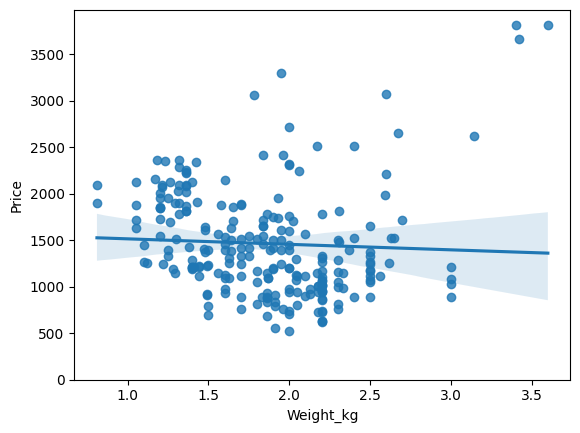

In [14]:
sns.regplot(x='Weight_kg', y='Price', data=df)
plt.ylim(0,)

Checking the Correlation Values of these three attributes with Price

In [15]:
for params in ['CPU_frequency', 'Screen_Size_cm', 'Weight_kg']:
    print(f'Correlation of Price and {params} is ',df[[params,'Price']].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_cm is                  Screen_Size_cm     Price
Screen_Size_cm        1.000000 -0.126672
Price                -0.126672  1.000000
Correlation of Price and Weight_kg is             Weight_kg     Price
Weight_kg   1.000000 -0.050312
Price      -0.050312  1.000000


From the observation we can know that the "CPU_Frequency" has a **36%** Positive Correlation with the price of the Laptop. But 36% Correlation is a weak correlation while the other 2 parameters have a weak correlation with price.

## Visualizing Categorical Feature Patterns

Generating Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

Generating Box Plot for **'Category'** against **'Price'**

<Axes: xlabel='Category', ylabel='Price'>

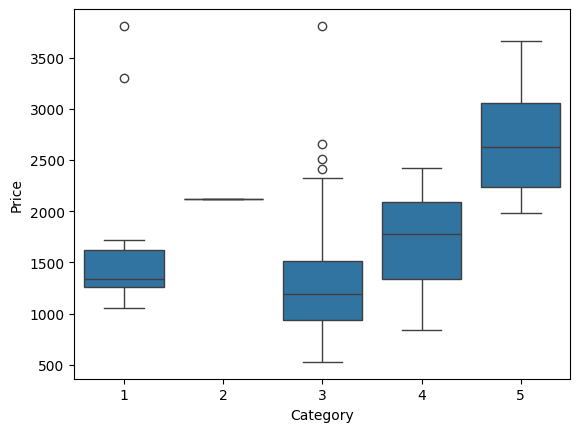

In [16]:
sns.boxplot(x='Category', y='Price', data=df)

Generating Box Plot for **'GPU'** against **'Price'**

<Axes: xlabel='GPU', ylabel='Price'>

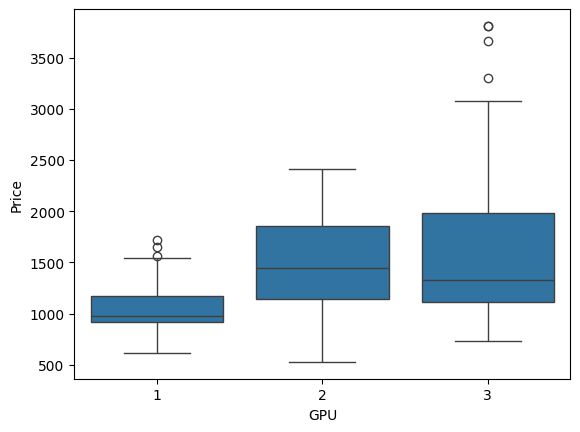

In [17]:
sns.boxplot(x='GPU', y='Price', data=df)

Generating Box Plot for **'OS'** against **'Price'**

<Axes: xlabel='OS', ylabel='Price'>

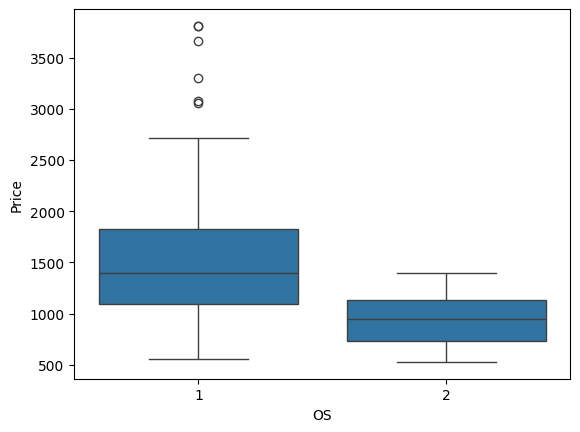

In [18]:
sns.boxplot(x='OS', y='Price', data=df)

Generating Box Plot for **'CPU_core'** against **'Price'**

<Axes: xlabel='CPU_core', ylabel='Price'>

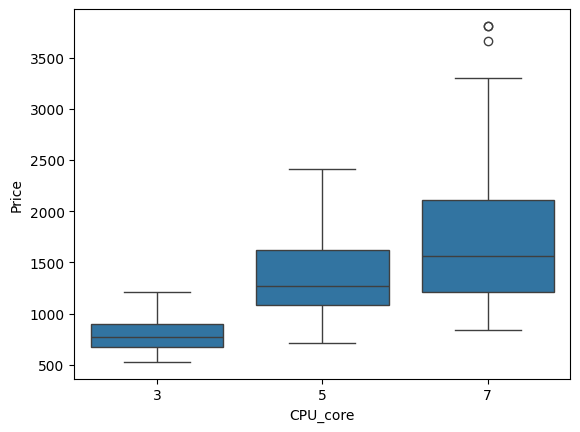

In [19]:
sns.boxplot(x='CPU_core', y='Price', data=df)

Generating Box Plot for **'RAM_GB'** against **'Price'**

<Axes: xlabel='RAM_GB', ylabel='Price'>

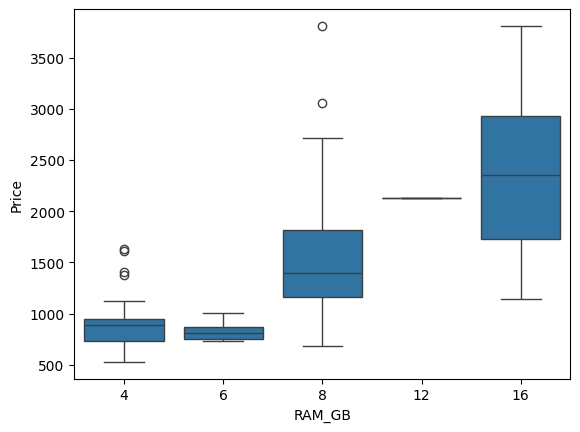

In [20]:
sns.boxplot(x='RAM_GB', y='Price', data=df)

Generating Box Plot for **'Storage_GB_SSD'** against **'Price'**

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

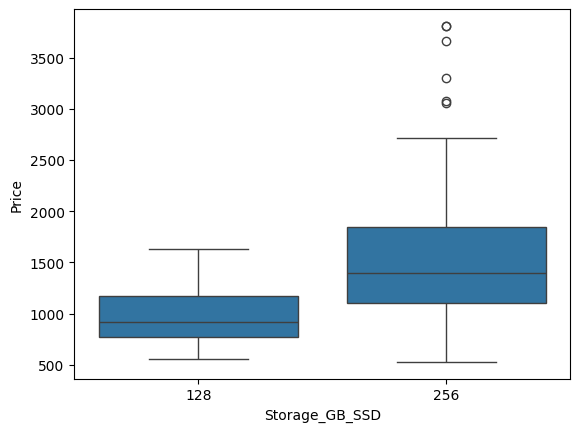

In [21]:
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

##Descriptive Statistical Analysis

Generating the statistical description of all features being used in this dataset including 'Object'.

In [22]:
print(df.describe())
print(df.describe(include=['object']))

         Category         GPU          OS    CPU_core  Screen_Size_cm  \
count  238.000000  238.000000  238.000000  238.000000      238.000000   
mean     3.205882    2.151261    1.058824    5.630252       37.269615   
std      0.776533    0.638282    0.235790    1.241787        2.946184   
min      1.000000    1.000000    1.000000    3.000000       30.480000   
25%      3.000000    2.000000    1.000000    5.000000       35.560000   
50%      3.000000    2.000000    1.000000    5.000000       38.100000   
75%      4.000000    3.000000    1.000000    7.000000       39.624000   
max      5.000000    3.000000    2.000000    7.000000       43.942000   

       CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg        Price  
count     238.000000  238.000000      238.000000  238.000000   238.000000  
mean        2.360084    7.882353      245.781513    1.862232  1462.344538  
std         0.411393    2.482603       34.765316    0.489090   574.607699  
min         1.200000    4.000000      

##GroupBy and Pivot Tables

Grouping the parameters **"GPU"**, **"CPU_core"** and **"Price"** to make a pivot table and visualize this connection using the pcolor plot.

In [23]:
df_test = df[['GPU', 'CPU_core', 'Price']]
df_grp = df_test.groupby(['GPU', 'CPU_core'], as_index= False).mean()
df_grp

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


Creating Pivot table

In [24]:
df_pivot = df_grp.pivot(index='GPU', columns='CPU_core')
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

Creating the plot.

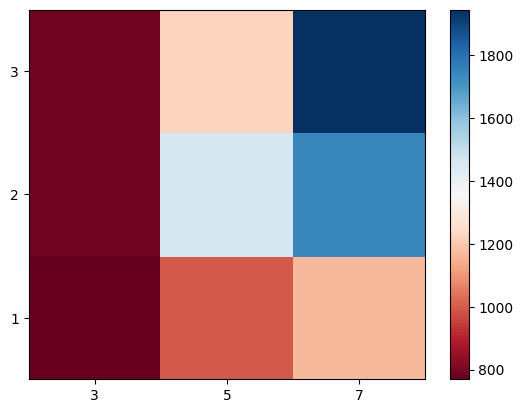

In [25]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

##Checking the Pearson Correlation and P-Values

By Using the **scipy.stats.pearsonr()** function to evaluate the Pearson Coefficient and the p-values for each parameter. By this we determine the parameters most likely to have a strong effect on the price of the laptops.

In [27]:
for param in ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_cm', 'Weight_kg', 'CPU_core', 'OS', 'GPU', 'Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(f"The Pearson Correlation Coefficient for {param} is {pearson_coef} with a P-Value of {p_value}")

The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857844 with a P-Value of 3.6815606288428415e-20
The Pearson Correlation Coefficient for CPU_frequency is 0.36666555892588604 with a P-Value of 5.502463350713357e-09
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.243420755218103 with a P-Value of 0.0001489892319172414
The Pearson Correlation Coefficient for Screen_Size_cm is -0.12667154585920112 with a P-Value of 0.05096503856873851
The Pearson Correlation Coefficient for Weight_kg is -0.05031225837751544 with a P-Value of 0.4397693853433896
The Pearson Correlation Coefficient for CPU_core is 0.4593977773355115 with a P-Value of 7.912950127009183e-14
The Pearson Correlation Coefficient for OS is -0.22172980114827384 with a P-Value of 0.0005696642559246719
The Pearson Correlation Coefficient for GPU is 0.2882981988881427 with a P-Value of 6.16694969836445e-06
The Pearson Correlation Coefficient for Category is 0.28624275581264125 with a P-Value of 7.22569623580658

Based on the Pearson correlation analysis, **RAM\_GB** shows the highest correlation with price (0.55), indicating a moderate positive relationship — as RAM size increases, price tends to rise. **CPU\_core** (0.46) and **CPU\_frequency** (0.37) also display moderate positive correlations, while **Weight\_kg** and **Screen\_Size\_cm** have weak negative correlations with price. All features with p-values below 0.05 demonstrate statistically significant relationships, except **Weight\_kg**, which is not significant. This suggests that RAM size, CPU cores, and CPU speed are the most influential factors among the variables analyzed.
